## Importing Required Library

In [1]:
import numpy
import pandas as pd
import os
# ==============
print(f"Numpy Version: {numpy.__version__}")
print(f"Pandas version: {pd.__version__}")

Numpy Version: 1.25.2
Pandas version: 2.0.3


## Data Aquisition

In [2]:
path = os.getcwd() + "/Historical_db.csv" # google colab read the path with '/' not '\'
data = pd.read_csv(path) # reading csv file in this line
print(data.head()) # seeing first 5 results here

   id          date  open_price  high_price  low_price  close_price  \
0   1  May 24, 2024        2.45       2.480      2.347         2.46   
1   2  May 23, 2024        2.58       2.590      2.350         2.36   
2   3  May 22, 2024        2.57       2.650      2.530         2.56   
3   4  May 21, 2024        2.76       2.760      2.570         2.59   
4   5  May 20, 2024        2.73       2.819      2.675         2.73   

   adj_close     volume  
0       2.46  1,768,500  
1       2.36  2,220,400  
2       2.56  1,776,900  
3       2.59  2,242,700  
4       2.73  2,433,600  


So what we can do with this financial data of canoo Inc 1 year data.

1. Descriptive Statistics:
Calculate measures such as mean, median, mode, standard deviation, and range for each column (open_price, high_price, low_price, close_price, adj_close, volume).
2. Trend Analysis:
Plot the closing prices over time (date) to visualize the trend.
Calculate moving averages to identify trends more clearly.
3. Volatility Analysis:
Calculate the daily price range (high_price - low_price) to measure volatility.
Compute standard deviation of daily returns to quantify volatility.
4. Volume Analysis:
Analyze trading volume trends over time.
Look for any correlation between volume and price movements.
5. Correlation Analysis:
Examine the correlation between different variables, such as closing price and volume.
Simple Returns and Log Returns:
Calculate daily simple returns (percentage change in closing price) and log returns.
6. Performance Metrics:
Calculate performance metrics such as cumulative returns, annualized returns, and Sharpe ratio.
Support and Resistance Levels:
Identify potential support and resistance levels based on historical price data.
7. Pattern Recognition:
Look for chart patterns such as head and shoulders, triangles, flags, etc.
8. Seasonality Analysis:
Examine whether there are any seasonal patterns in the stock's performance.
These analyses can provide valuable insights into the stock's past performance and help in making informed decisions about future investments. Keep in mind that these are just basic analyses, and there are more advanced techniques available for deeper analysis

So basic of data clearning

1. Handling Missing Values:
Check for missing values in each column and decide how to handle them. Options include removing rows with missing values, imputing missing values using mean, median, or interpolation, or using advanced imputation techniques.

2. Data Type Conversion:
Ensure that each column has the correct data type. For example, dates should be in the datetime format, and numerical values should be in appropriate numerical formats.

3. Removing Duplicates:
Check for and remove any duplicate rows to avoid skewing analysis results.

4. Handling Outliers:
Identify and decide how to handle outliers, which could significantly impact analysis results. Options include removing outliers, capping or winsorizing extreme values, or transforming the data.

5. Standardizing Units:
Ensure consistency in units across different columns if applicable. For example, if volume is expressed in different units (e.g., millions vs. thousands), standardize them to a single unit.

6. Data Transformation:
Perform any necessary data transformations, such as converting prices to logarithmic scale or normalizing volume data.

7. Adjusting for Corporate Actions:
Adjust historical prices for any corporate actions such as stock splits or dividends to ensure accurate analysis.

8. Handling Data Entry Errors:
Check for and correct any obvious data entry errors or inconsistencies.

9. Feature Engineering:
Create new features if needed, such as calculating moving averages or technical indicators, to enhance analysis.

10. Data Validation:
Validate the data against external sources or business rules to ensure accuracy and integrity.


In [3]:
# missing values any ?
data.isnull().sum()
# if we found any missing values to deal with those we have couple of way either we fill some assumed or mean median mode values
# or interpolation values else with some advance imputation values techniques.


id             0
date           0
open_price     0
high_price     0
low_price      0
close_price    0
adj_close      0
volume         0
dtype: int64

In [4]:
# Data types and there Conversion if needed
data.dtypes
# NOTE PRICE IN THE DATASET, WE HAVE IS IN US CURRENCY


id               int64
date            object
open_price     float64
high_price     float64
low_price      float64
close_price    float64
adj_close      float64
volume          object
dtype: object

In [5]:
# so from the above out i see the date i got is object type i want it to be date type
# also volumne column is given with object data type instead of float or int because it ',' separated.
# Assuming your DataFrame is named 'data'
data['volume'] = data['volume'].str.replace(',', '').astype(float)

# Alternatively, you can convert it to int if needed
# data['volume'] = data['volume'].str.replace(',', '').astype(int)
print(data)
# Now 'volume' column is converted to int or float data type
# Assuming your DataFrame is named 'date_data'
date_data = data  # Replace 'data' with your DataFrame

# Convert 'date' column to datetime with custom format
date_data['date'] = pd.to_datetime(date_data['date'], format='%b %d, %Y')
print(date_data.head(), "\n=======\n")
# Create a new DataFrame with 'id' and 'date' columns
id_date_df = date_data[['id', 'date']]
print(id_date_df.head(), "\n=======\n")
# Sort the DataFrame by 'date' while preserving the original 'id' order
sorted_df = date_data.sort_values(by='date')
print(sorted_df.head(), "\n=======\n")
# Now 'sorted_df' is sorted by 'date', and 'id_date_df' contains 'id' and 'date' columns


      id          date  open_price  high_price  low_price  close_price  \
0      1  May 24, 2024       2.450       2.480      2.347        2.460   
1      2  May 23, 2024       2.580       2.590      2.350        2.360   
2      3  May 22, 2024       2.570       2.650      2.530        2.560   
3      4  May 21, 2024       2.760       2.760      2.570        2.590   
4      5  May 20, 2024       2.730       2.819      2.675        2.730   
..   ...           ...         ...         ...        ...          ...   
247  248   Jun 1, 2023      12.650      12.834     12.535       12.604   
248  249  May 31, 2023      13.202      13.225     12.535       12.788   
249  250  May 30, 2023      13.823      13.892     12.535       13.202   
250  251  May 26, 2023      13.340      14.536     13.202       13.616   
251  252  May 25, 2023      14.237      14.260     12.995       13.156   

     adj_close     volume  
0        2.460  1768500.0  
1        2.360  2220400.0  
2        2.560  1776900.0  

In [6]:
# checkingiif any duplicate record is here or not ?
# Assuming your DataFrame is named 'date_data'
# date_data = data  # Replace 'data' with your DataFrame

# Check for duplicate dates
duplicate_dates = date_data[date_data.duplicated(subset=['date'], keep=False)]

# Print duplicate dates
print("Duplicate Dates:\n", duplicate_dates)


Duplicate Dates:
 Empty DataFrame
Columns: [id, date, open_price, high_price, low_price, close_price, adj_close, volume]
Index: []


In [7]:
# import seaborn as sns
# # Assuming your DataFrame is named 'data'
# summary = date_data.describe()

# # Print the summary statistics
# print(summary)

# # Visualize the data using box plots
# date_data.boxplot()

# # Alternatively, you can use seaborn for more customized visualizations
# sns.boxplot(data=date_data)

# # Compute the z-score for each data point
# z_scores = (data - data.mean()) / data.std()

# # Identify potential outliers based on z-score threshold
# potential_outliers = data[abs(z_scores) > 3]

# # Calculate the interquartile range (IQR)
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1

# # Identify potential outliers based on IQR
# potential_outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

# # Use domain knowledge or context-specific information to identify outliers
# # For example, if you know the typical range of values for a given variable in your domain,
# # you can flag values outside that range as potential outliers

# # Perform statistical tests or hypothesis tests to identify outliers
# # Depending on your data and analysis goals, you may use different statistical tests to identify outliers,
# # such as Grubbs' test, Dixon's Q test, or Tukey's method.


                                date  open_price  high_price   low_price  \
count                            252  252.000000  252.000000  252.000000   
mean   2023-11-25 00:05:42.857142784    7.441956    7.784591    7.038290   
min              2023-05-25 00:00:00    1.290000    1.380000    1.220000   
25%              2023-08-24 18:00:00    3.335000    3.540000    3.214250   
50%              2023-11-23 00:00:00    6.175500    6.405500    5.830500   
75%              2024-02-26 06:00:00   11.764500   12.190000   11.241250   
max              2024-05-24 00:00:00   17.250000   19.504000   16.123000   
std                              NaN    4.332517    4.533864    4.097677   

       close_price   adj_close        volume  
count   252.000000  252.000000  2.520000e+02  
mean      7.346563    7.346563  3.441384e+06  
min       1.310000    1.310000  2.994000e+05  
25%       3.352250    3.352250  9.653432e+05  
50%       6.026000    6.026000  1.745268e+06  
75%      11.712750   11.712750  3

<ipython-input-8-130c6fafad80>:19: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  z_scores = (date_data - date_data.mean()) / date_data.std()


,date,open_price,high_price,low_price,close_price,adj_close,volume
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
247,NaT,NaN,NaN,NaN,NaN,NaN,NaN
248,NaT,NaN,NaN,NaN,NaN,NaN,NaN
249,NaT,NaN,NaN,NaN,NaN,NaN,NaN
250,NaT,NaN,NaN,NaN,NaN,NaN,NaN


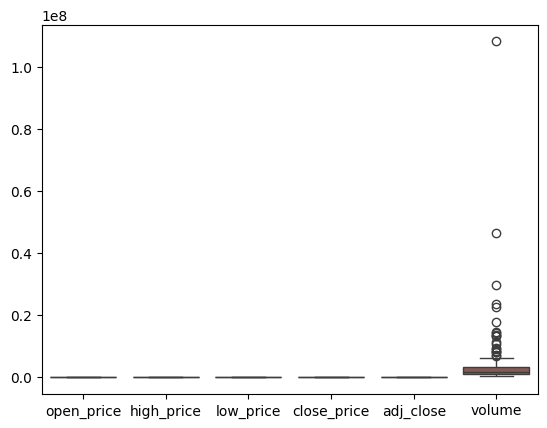

In [8]:
import pandas as pd
import seaborn as sns

# Assuming your DataFrame is named 'date_data'
# Convert 'date' column to datetime dtype
date_data['date'] = pd.to_datetime(date_data['date'])

# Drop the 'id' column if it's not needed
date_data = date_data.drop(columns=['id'])

# Summary statistics
summary = date_data.describe()
print(summary)

# Box plot
sns.boxplot(data=date_data)

# Compute z-scores
z_scores = (date_data - date_data.mean()) / date_data.std()

# Identify potential outliers based on z-score threshold
potential_outliers = date_data[abs(z_scores) > 3]

# Calculate IQR
Q1 = date_data.quantile(0.25)
Q3 = date_data.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers based on IQR
potential_outliers_iqr = date_data[(date_data < (Q1 - 1.5 * IQR)) | (date_data > (Q3 + 1.5 * IQR))]

# Display potential outliers
print("Outliers based on z-score:")
# print(potential_outliers)
# print("\nOutliers based on IQR:")
# print(potential_outliers_iqr)

potential_outliers

In [9]:
date_data

,date,open_price,high_price,low_price,close_price,adj_close,volume
0,2024-05-24,2.450,2.480,2.347,2.460,2.460,1768500.0
1,2024-05-23,2.580,2.590,2.350,2.360,2.360,2220400.0
2,2024-05-22,2.570,2.650,2.530,2.560,2.560,1776900.0
3,2024-05-21,2.760,2.760,2.570,2.590,2.590,2242700.0
4,2024-05-20,2.730,2.819,2.675,2.730,2.730,2433600.0
...,...,...,...,...,...,...,...
247,2023-06-01,12.650,12.834,12.535,12.604,12.604,510513.0
248,2023-05-31,13.202,13.225,12.535,12.788,12.788,620200.0
249,2023-05-30,13.823,13.892,12.535,13.202,13.202,945326.0
250,2023-05-26,13.340,14.536,13.202,13.616,13.616,603843.0


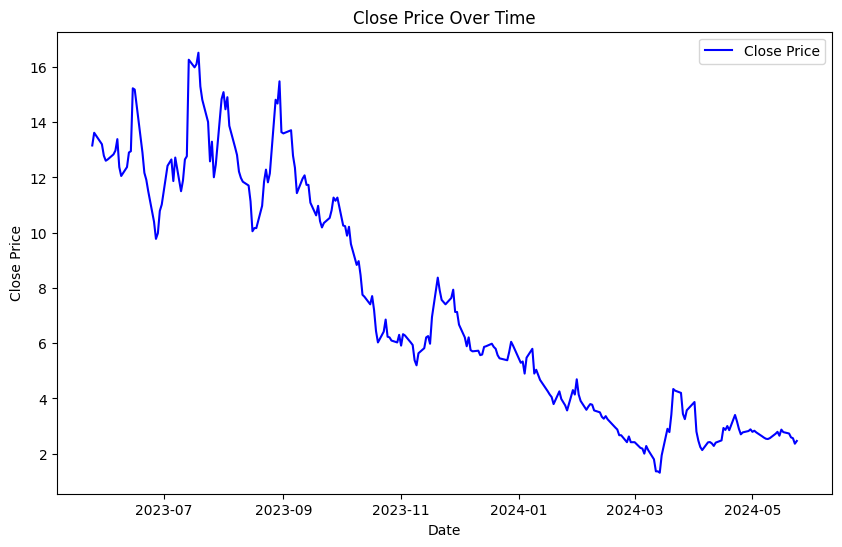

In [10]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Convert 'date' column to datetime dtype (if not already done)
date_data['date'] = pd.to_datetime(date_data['date'])

# Set the 'date' column as the index
date_data.set_index('date', inplace=True)

# Time series plot
plt.figure(figsize=(10, 6))
plt.plot(date_data.index, date_data['close_price'], color='blue', label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Candlestick plot
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=date_data.index,
                                     open=date_data['open_price'],
                                     high=date_data['high_price'],
                                     low=date_data['low_price'],
                                     close=date_data['close_price'])])

fig.update_layout(title='Candlestick Plot',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


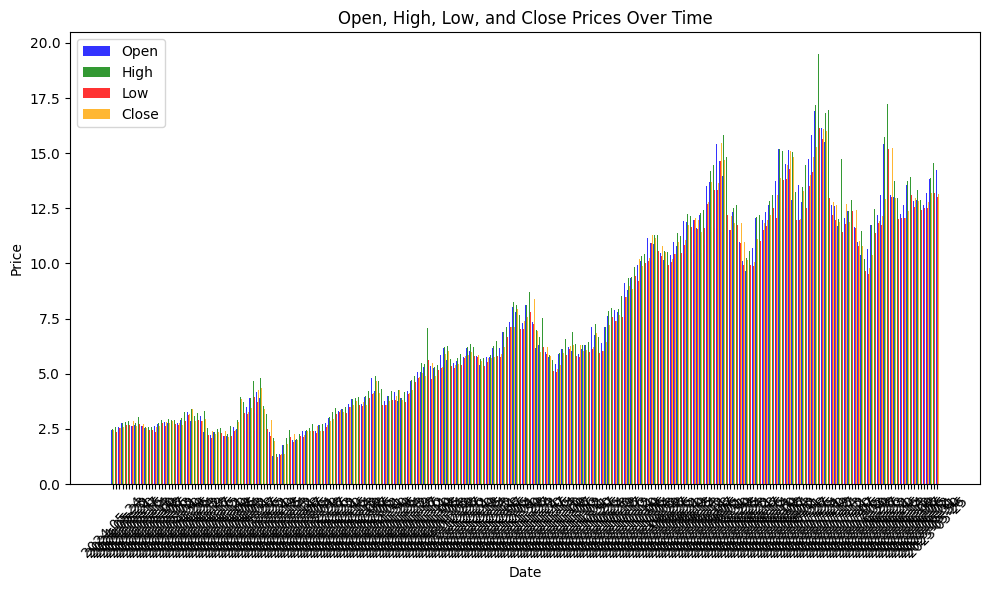

In [11]:
# Bar graph for open, high, low, and close prices
plt.figure(figsize=(10, 6))
bar_width = 0.2
opacity = 0.8
index = numpy.arange(len(date_data))

plt.bar(index, date_data['open_price'], bar_width, alpha=opacity, color='blue', label='Open')
plt.bar(index + bar_width, date_data['high_price'], bar_width, alpha=opacity, color='green', label='High')
plt.bar(index + 2*bar_width, date_data['low_price'], bar_width, alpha=opacity, color='red', label='Low')
plt.bar(index + 3*bar_width, date_data['close_price'], bar_width, alpha=opacity, color='orange', label='Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open, High, Low, and Close Prices Over Time')
plt.xticks(index + 1.5*bar_width, date_data.index.strftime('%Y-%m-%d'), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
# going to look messy


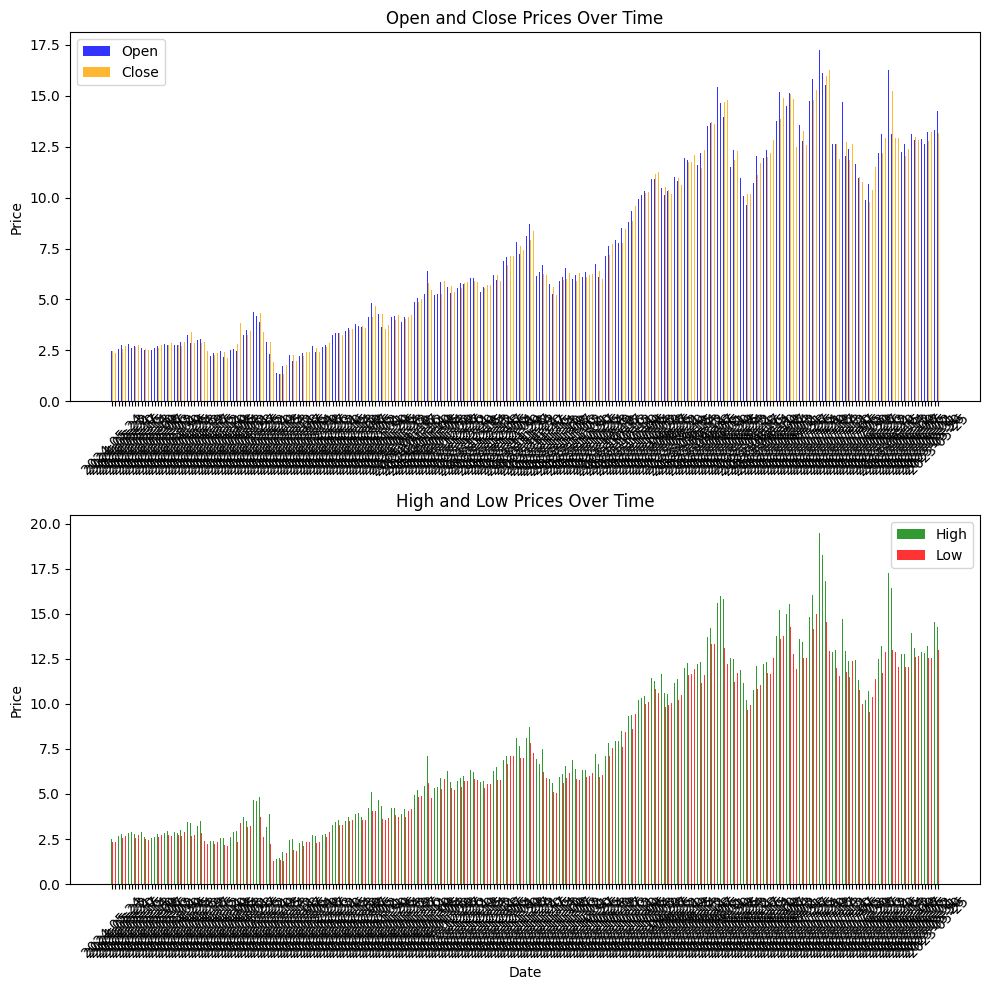

In [12]:
# Create subplots for open/close and high/low prices
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Bar graph for open and close prices
axes[0].bar(index, date_data['open_price'], bar_width, alpha=opacity, color='blue', label='Open')
axes[0].bar(index + bar_width, date_data['close_price'], bar_width, alpha=opacity, color='orange', label='Close')

axes[0].set_ylabel('Price')
axes[0].set_title('Open and Close Prices Over Time')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(date_data.index.strftime('%Y-%m-%d'), rotation=45)
axes[0].legend()

# Bar graph for high and low prices
axes[1].bar(index, date_data['high_price'], bar_width, alpha=opacity, color='green', label='High')
axes[1].bar(index + bar_width, date_data['low_price'], bar_width, alpha=opacity, color='red', label='Low')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].set_title('High and Low Prices Over Time')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(date_data.index.strftime('%Y-%m-%d'), rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


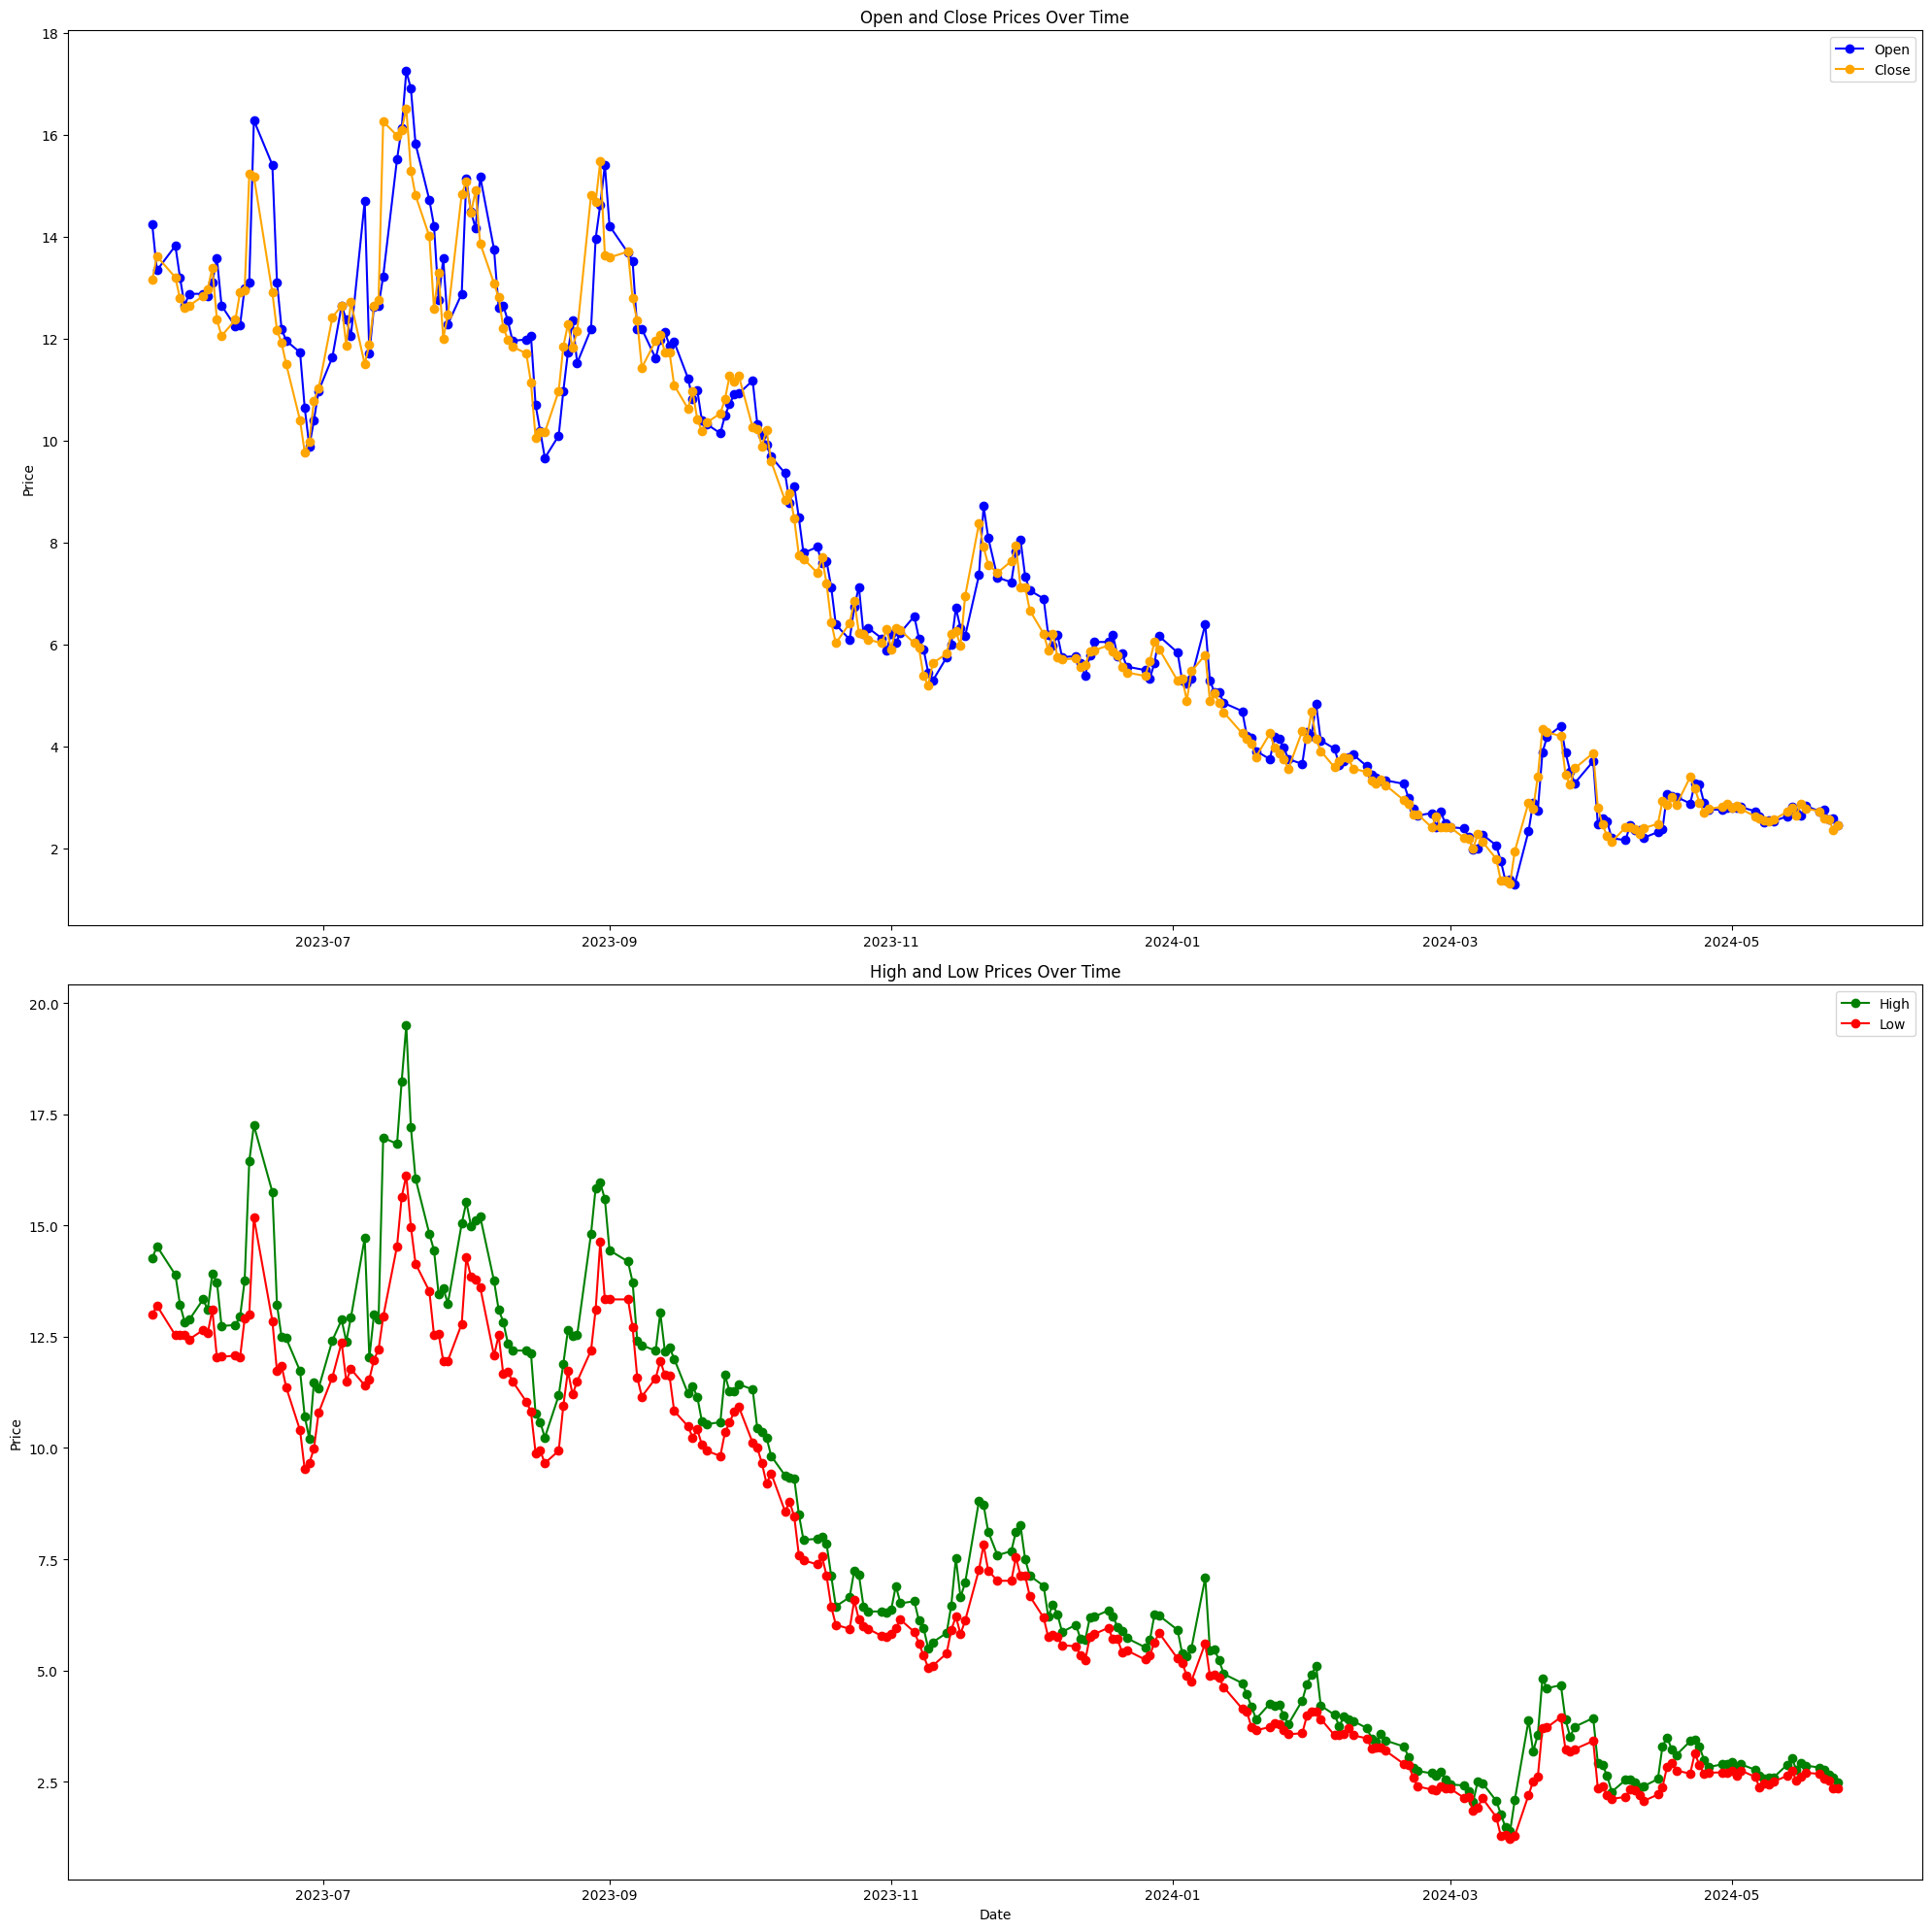

In [13]:
# Create subplots for open/close and high/low prices
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

# Line plot for open and close prices
axes[0].plot(date_data.index, date_data['open_price'], marker='o', linestyle='-', color='blue', label='Open')
axes[0].plot(date_data.index, date_data['close_price'], marker='o', linestyle='-', color='orange', label='Close')

axes[0].set_ylabel('Price')
axes[0].set_title('Open and Close Prices Over Time')
axes[0].legend()

# Line plot for high and low prices
axes[1].plot(date_data.index, date_data['high_price'], marker='o', linestyle='-', color='green', label='High')
axes[1].plot(date_data.index, date_data['low_price'], marker='o', linestyle='-', color='red', label='Low')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].set_title('High and Low Prices Over Time')
axes[1].legend()

plt.tight_layout()
plt.show()

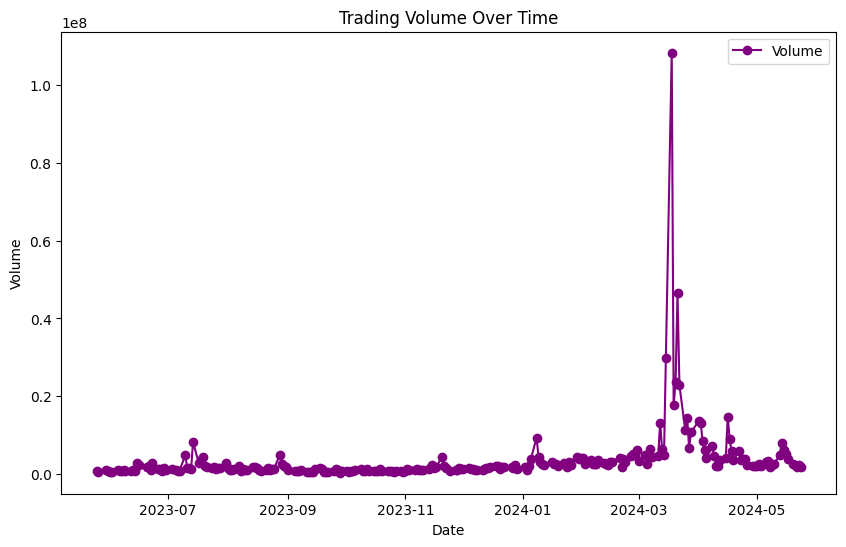

In [14]:
# Volume Plot
plt.figure(figsize=(10, 6))
plt.plot(date_data.index, date_data['volume'], marker='o', linestyle='-', color='purple', label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()


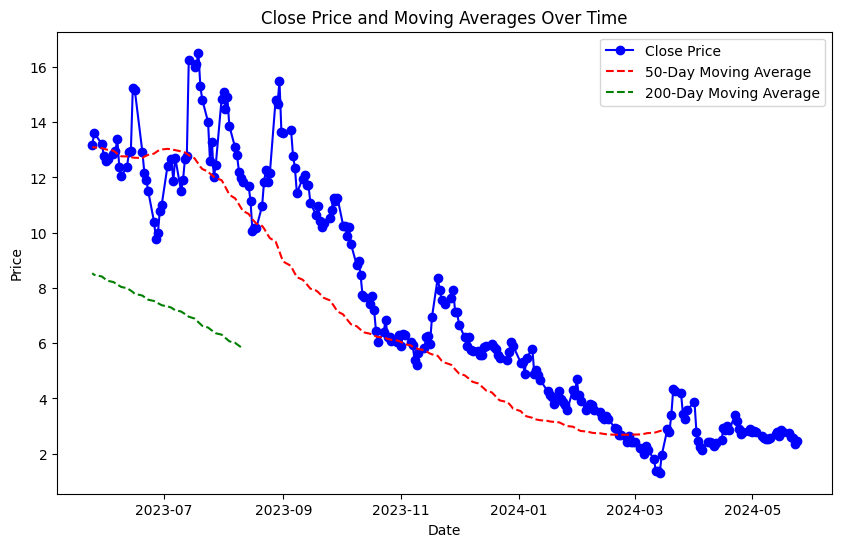

In [15]:
# Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(date_data.index, date_data['close_price'], marker='o', linestyle='-', color='blue', label='Close Price')
plt.plot(date_data.index, date_data['close_price'].rolling(window=50).mean(), linestyle='--', color='red', label='50-Day Moving Average')
plt.plot(date_data.index, date_data['close_price'].rolling(window=200).mean(), linestyle='--', color='green', label='200-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Moving Averages Over Time')
plt.legend()
plt.show()


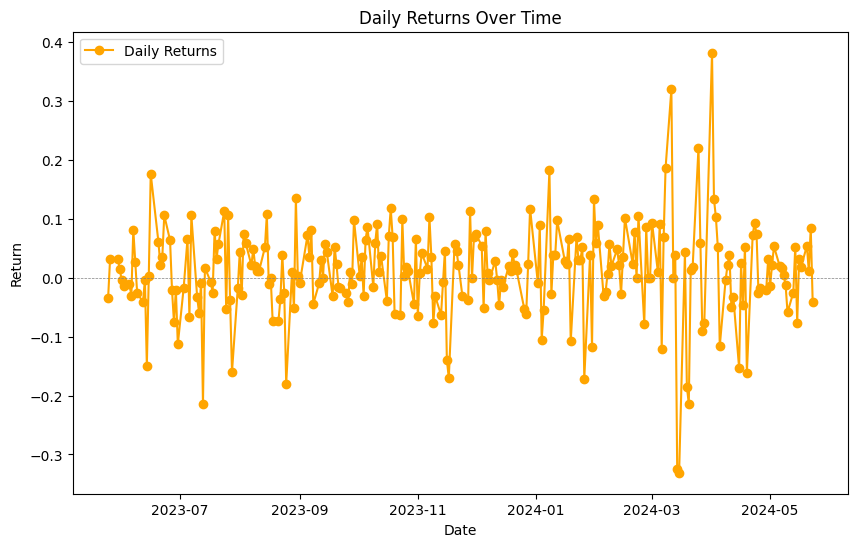

In [16]:
# Returns Plot
returns = date_data['close_price'].pct_change()
plt.figure(figsize=(10, 6))
plt.plot(date_data.index, returns, marker='o', linestyle='-', color='orange', label='Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Daily Returns Over Time')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.legend()
plt.show()


In [17]:
date_data.head()
# print(date_data.info())

,open_price,high_price,low_price,close_price,adj_close,volume
date,,,,,,
2024-05-24,2.45,2.480,2.347,2.46,2.46,1768500.0
2024-05-23,2.58,2.590,2.350,2.36,2.36,2220400.0
2024-05-22,2.57,2.650,2.530,2.56,2.56,1776900.0
2024-05-21,2.76,2.760,2.570,2.59,2.59,2242700.0
2024-05-20,2.73,2.819,2.675,2.73,2.73,2433600.0


Standardizing Units:
To ensure consistency in units across different columns, you need to make sure that all measurements are expressed in the same unit. For example, if volume is expressed in millions in one column and thousands in another, you might want to standardize them to a single unit, such as millions. Here's how you could do it.

In [18]:
# Standardize volume to millions
date_data['volume'] = date_data['volume'] / 1000000  # Assuming volume is originally in thousands


Data Transformation:
Data transformation involves modifying the data to make it more suitable for analysis. This could include tasks like converting prices to logarithmic scale or normalizing volume data. Here's an example of how you could normalize volume data

In [19]:
# Normalize volume data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
date_data['volume_normalized'] = scaler.fit_transform(date_data[['volume']])


Adjusting for Corporate Actions:
Adjusting historical prices for corporate actions such as stock splits or dividends ensures the accuracy of analysis. This can be a complex task and might require additional information about corporate actions. Here's a simplified example of adjusting for stock splits.


In [20]:
# Adjust for stock splits
split_ratio = 2  # Example: 2-for-1 stock split
date_data['adjusted_close'] = date_data['close_price'] * split_ratio

Handling Data Entry Errors:
To check for and correct obvious errors or inconsistencies in data entry, you might want to perform data validation or use domain knowledge to identify outliers. Here's a basic example of checking for outliers using z-scores.

In [21]:
# Check for outliers in close_price using z-scores
z_scores1 = (date_data['close_price'] - date_data['close_price'].mean()) / date_data['close_price'].std()
outliers = date_data[abs(z_scores1) > 3]
print("Zscores1\n",z_scores1)
print("Outliers\n",outliers)


Zscores1
 date
2024-05-24   -1.143128
2024-05-23   -1.166521
2024-05-22   -1.119735
2024-05-21   -1.112717
2024-05-20   -1.079966
                ...   
2023-06-01    1.229887
2023-05-31    1.272931
2023-05-30    1.369779
2023-05-26    1.466628
2023-05-25    1.359018
Name: close_price, Length: 252, dtype: float64
Outliers
 Empty DataFrame
Columns: [open_price, high_price, low_price, close_price, adj_close, volume, volume_normalized, adjusted_close]
Index: []


Feature Engineering:
Feature engineering involves creating new features from existing ones to improve analysis. This can include adding indicators or aggregating data. Here's an example of creating a moving average feature.

In [22]:
# Create a 7-day moving average of close_price
date_data['close_price_ma_7'] = date_data['close_price'].rolling(window=7).mean()
print(date_data)

            open_price  high_price  low_price  close_price  adj_close  \
date                                                                    
2024-05-24       2.450       2.480      2.347        2.460      2.460   
2024-05-23       2.580       2.590      2.350        2.360      2.360   
2024-05-22       2.570       2.650      2.530        2.560      2.560   
2024-05-21       2.760       2.760      2.570        2.590      2.590   
2024-05-20       2.730       2.819      2.675        2.730      2.730   
...                ...         ...        ...          ...        ...   
2023-06-01      12.650      12.834     12.535       12.604     12.604   
2023-05-31      13.202      13.225     12.535       12.788     12.788   
2023-05-30      13.823      13.892     12.535       13.202     13.202   
2023-05-26      13.340      14.536     13.202       13.616     13.616   
2023-05-25      14.237      14.260     12.995       13.156     13.156   

              volume  volume_normalized  adjusted_